# Imports
---

In [75]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

# Cargar Data
___

In [2]:
#index col para que sepa que esa corresponde a los indices
df_data = pd.read_csv('./dataset_clean.csv', index_col=[0])

# Procesamiento de datos
___

> Comprobar si Dataset es balanceado

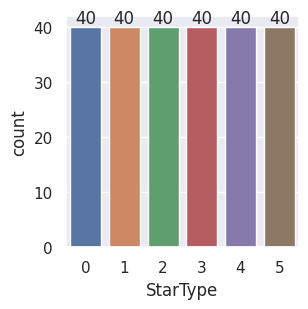

In [3]:
plt.figure(figsize=(3,3))

balanceSplot = sns.countplot( x = df_data['StarType'] )
#balanceSplot = sns.countplot(df_data.StarType)

plt.bar_label(balanceSplot.containers[0])
plt.show()

> Balancear (undersampling o oversampling)

> Target categórico a numérico

- Saco lista con labels categóricos (np.unique)

- Creo lista con labels numéricos

- Remplazo labels categóricos con numéricos

> Manejo de Features categóricos con dummies (One-hot encoding)

- Copio el dataset original (para no modificarlo) 

In [4]:
df_data_dummies = df_data.copy()

- Convierto features categóricas a dummies/indicadores

In [5]:
df_data_dummies = pd.get_dummies(df_data_dummies)

- Compruebo los dummies

In [6]:
#df_data_dummies
df_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   240 non-null    int64  
 1   Luminosity                    240 non-null    float64
 2   Radius                        240 non-null    float64
 3   AbsoluteMagnitude             240 non-null    float64
 4   StarType                      240 non-null    int64  
 5   StarColor_blue                240 non-null    uint8  
 6   StarColor_blue-white          240 non-null    uint8  
 7   StarColor_orange              240 non-null    uint8  
 8   StarColor_orange-red          240 non-null    uint8  
 9   StarColor_pale-yellow-orange  240 non-null    uint8  
 10  StarColor_red                 240 non-null    uint8  
 11  StarColor_white               240 non-null    uint8  
 12  StarColor_white-yellow        240 non-null    uint8  
 13  StarC

> Manejo de Features categóricos con replace a valores numéricos

- Copio el dataset original (para no modificarlo) 

In [7]:
df_data_replace = df_data.copy()

- Saco lista con labels categóricos

In [8]:
StarColor = list(np.unique(df_data_replace['StarColor']))
len(StarColor)

12

In [9]:
SpectralClass = list(np.unique(df_data_replace['SpectralClass']))
len(SpectralClass)

7

- Creo lista numéricas

In [10]:
numericalStarColor = list(range(1,13))
numericalSpectralClass = list(range(1,8))

- Remplazo labels categóricos con numéricos

In [11]:
df_data_replace['StarColor'].replace(StarColor, numericalStarColor, inplace = True)
list(np.unique(df_data_replace['StarColor']))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [12]:
df_data_replace['SpectralClass'].replace(SpectralClass, numericalSpectralClass, inplace = True)
list(np.unique(df_data_replace['SpectralClass']))

[1, 2, 3, 4, 5, 6, 7]

# Análisis exploratorio de datos Particular LR
___

> Análisis de correlación entre variables

- Heatmap de correlación entre variables

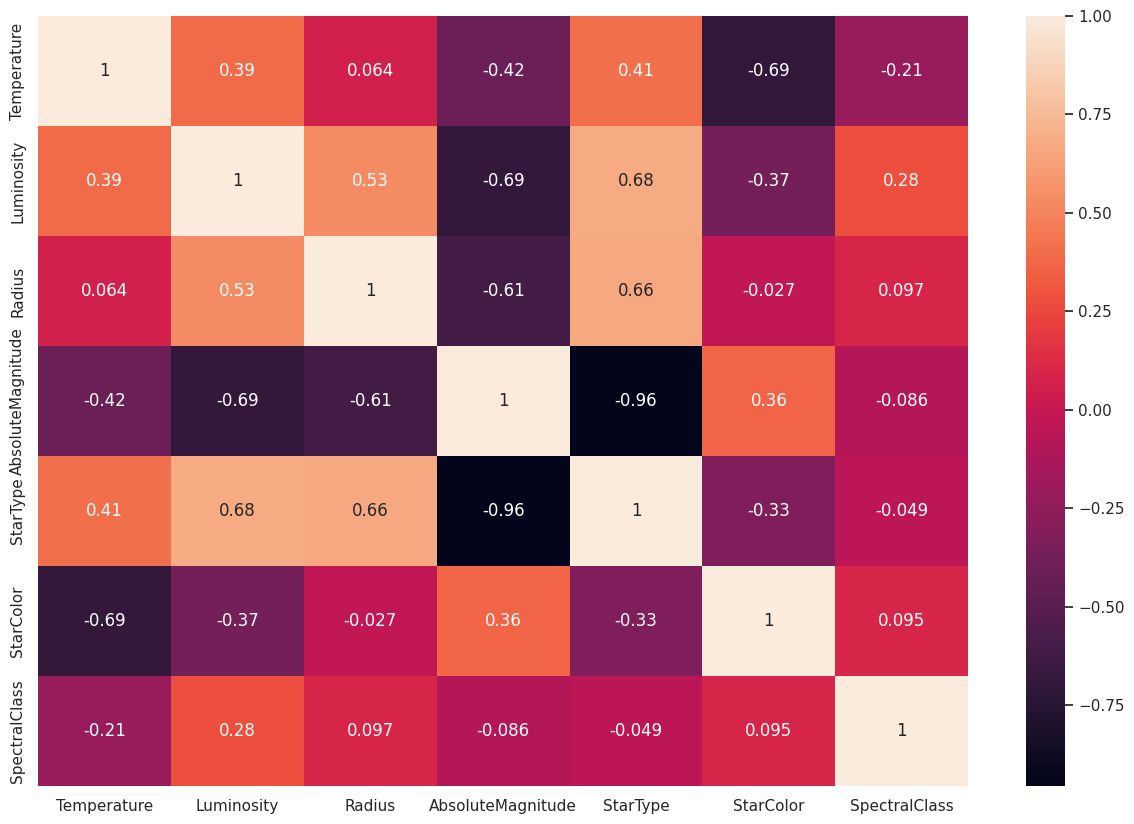

In [13]:
# Para dataset sin dummies
plt.figure(figsize=(15,10))
sns.heatmap(df_data_replace.corr(), annot=True)
plt.show()

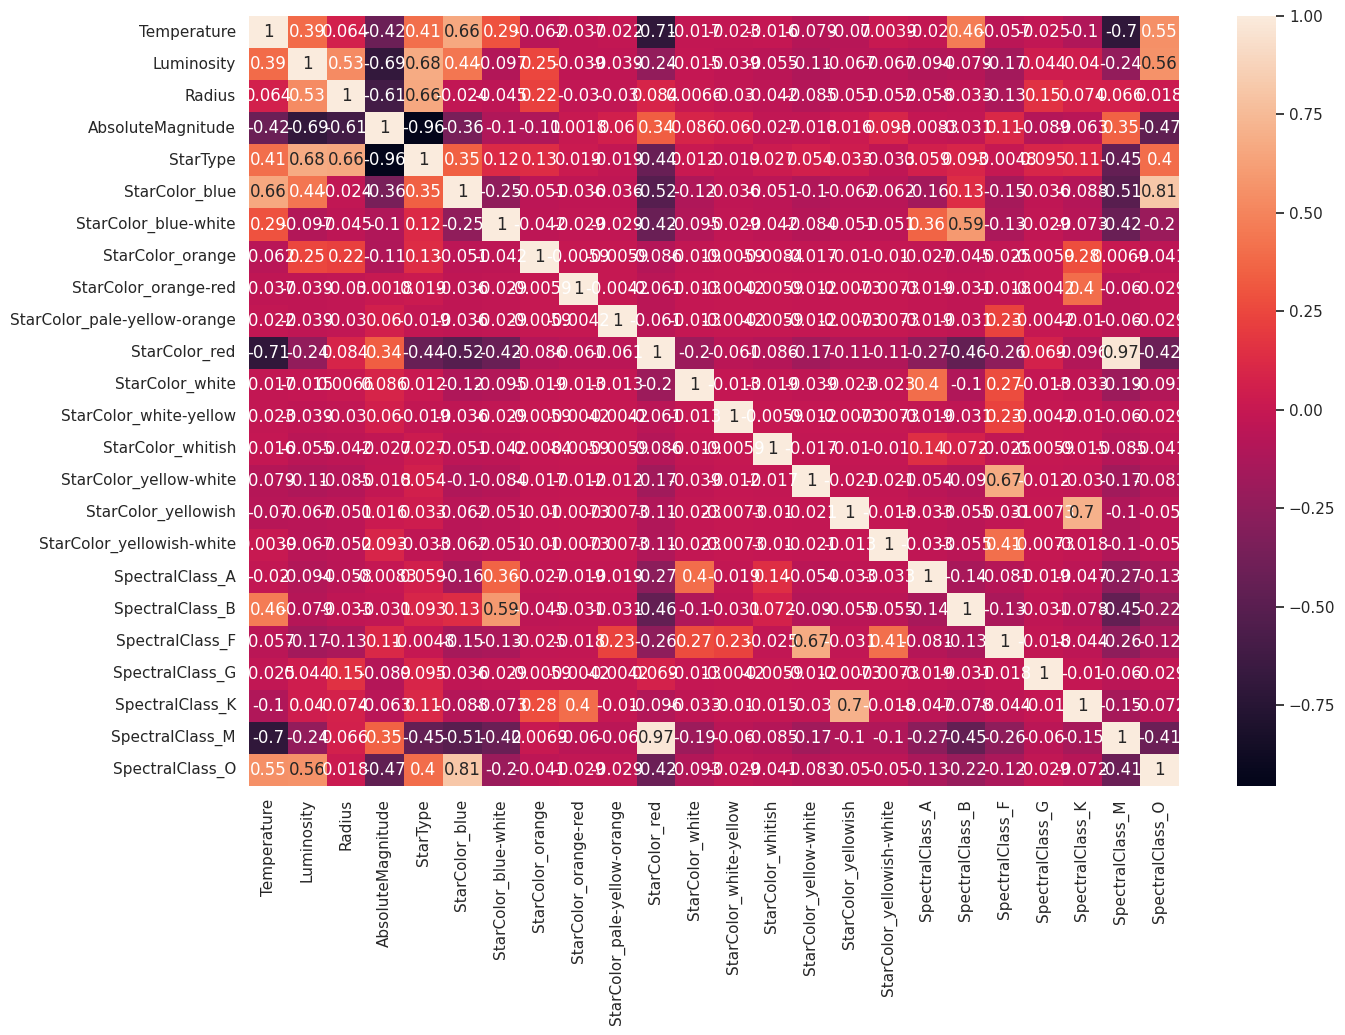

In [14]:
# Para dataset sin dummies
plt.figure(figsize=(15,10))
sns.heatmap(df_data_dummies.corr(), annot=True)
plt.show()

- Elimino features correlacionados (Eliminar Multicolinealidad)

In [15]:
# Hago una copia y de ella elimino
df_data_dummies_drop = df_data_dummies.drop(['StarColor_red'], axis=1, inplace=False)

# Compruebo - comparo
print(len(df_data_dummies.columns))
print(len(df_data_dummies_drop.columns))

24
23


> Análisis de correlación con Target (Puedo estimar cuales seran los pesos de los features, o eliminar aquellos no relacionados)

- Barplot de correlación

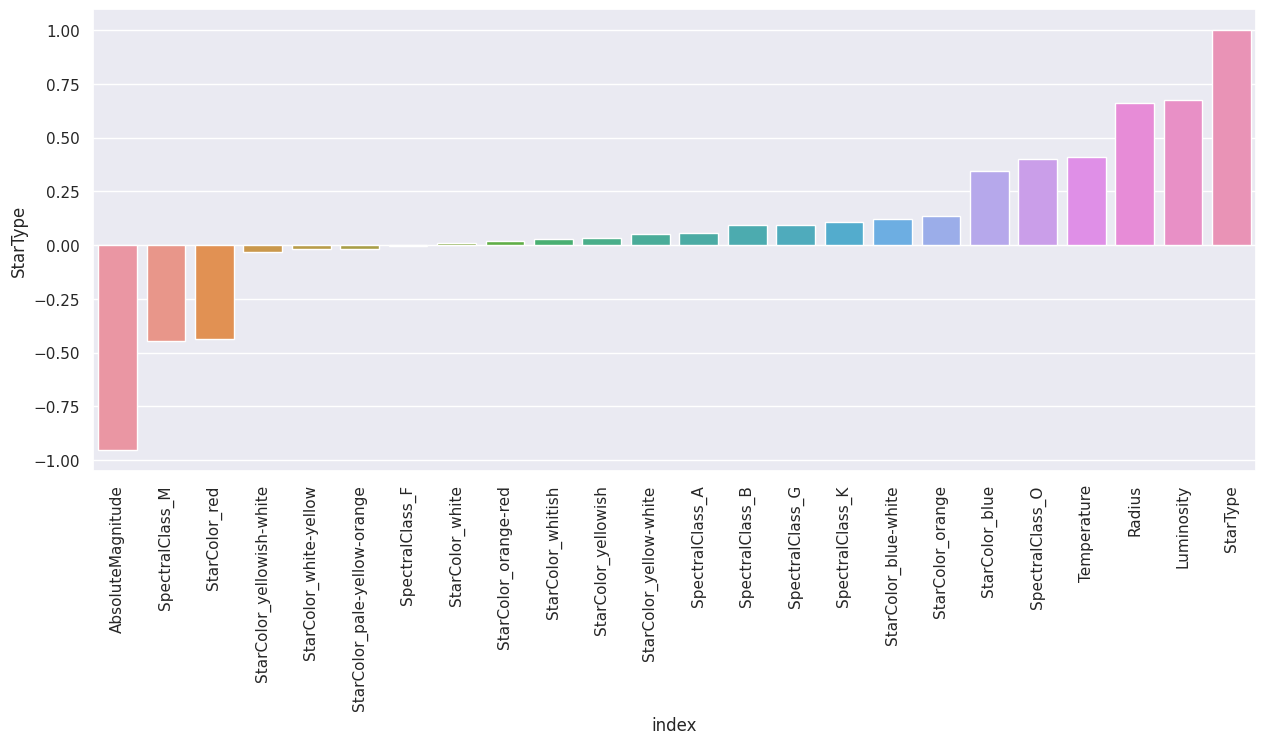

In [81]:
plt.figure(figsize=(15,6))
#plt.figure(figsize=(25,19))

corrDF = pd.DataFrame(df_data_dummies.corr()['StarType'].sort_values(ascending=True)).reset_index()
corrSplot = sns.barplot(data= corrDF,x='index', y='StarType')

#plt.bar_label(corrSplot.containers[0])
plt.xlabel='Feature'
plt.ylabel='Correlación'
plt.xticks(rotation=90)
plt.show()

- Eliminar datos (Mitigar overfitting por número de features extenso)

In [17]:
# Elimino
df_data_dummies_drop.drop(['SpectralClass_F'], axis=1, inplace=True)

# Compruebo - comparo
print(len(df_data_dummies.columns))
print(len(df_data_dummies_drop.columns))

24
22


> Gráficos target vs variables categóricas (Gráfico de repeticiones)

- Función para graficar cada variable categórica

In [18]:
def plot_categorical(column,row):
  catSplot = sns.countplot(data=df_data_replace, x=column, hue='StarType', ax = axs[row])

- Saco columnas categóricas a graficar

In [19]:
columns_cat = ['StarColor', 'SpectralClass']

- Subplots por itración sobre la función

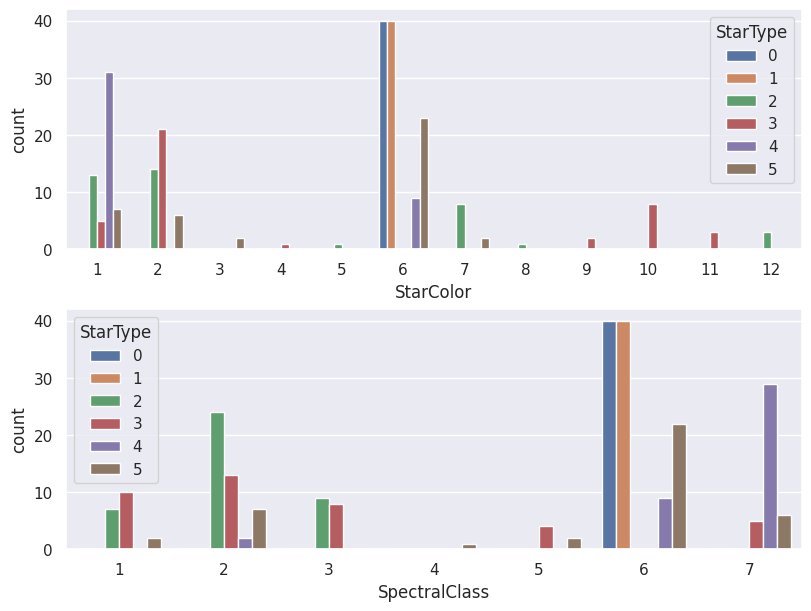

In [20]:
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(8,6))

row = 0
for column in columns_cat:
    plot_categorical(column, row)
    row += 1

> Diagramas de dispersión 3D, data no categórica vs target 

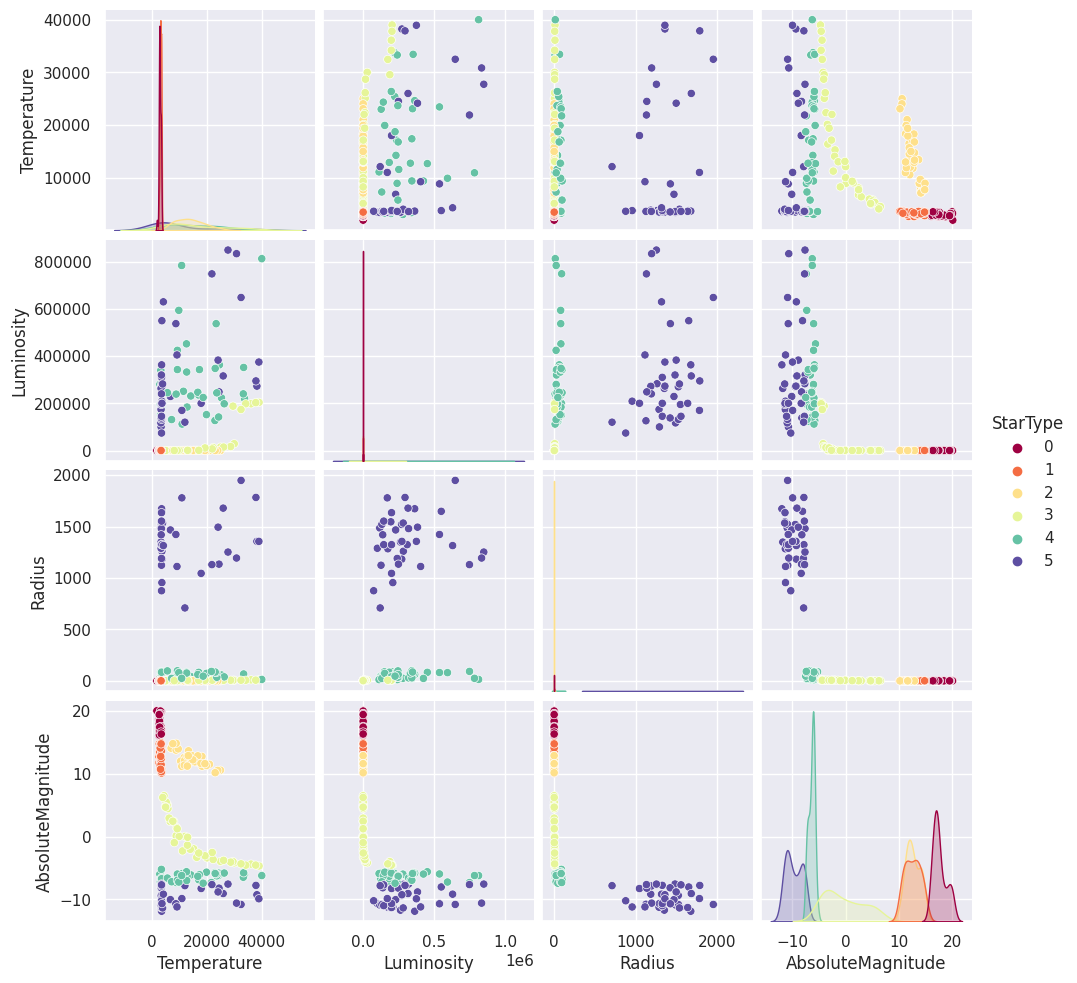

In [ ]:
sns.pairplot(data=df_data_replace.drop(columns_cat, axis=1, inplace=False), hue='StarType', palette="Spectral" )

# Exportar dataset procesado
___

In [76]:
# Para dataset: Replace
df_data_replace.to_csv("dataset_rp.csv", sep=',')

In [77]:
# Para dataset: Dummies
df_data_dummies.to_csv("dataset_dm.csv", sep=',')

In [78]:
# Para dataset: Dummies con Drop
df_data_dummies_drop.to_csv("dataset_dmDr.csv", sep=',')

# Split entre target y patron

---

In [53]:
# Para dataset: Replace
x_rp = df_data_replace.drop('StarType', axis=1)
y_rp = df_data_replace['StarType']

In [27]:
# Para dataset: Dummies
x_dm = df_data_dummies.drop('StarType', axis=1)
y_dm = df_data_dummies['StarType']

In [28]:
# Para dataset: Dummies con Drop
x_dmDr = df_data_dummies_drop.drop('StarType', axis=1)
y_dmDr = df_data_dummies_drop['StarType']

# Split entre train y test

___

In [60]:
# Para dataset: Replace
x_rp_train, x_rp_test, y_rp_train, y_rp_test = train_test_split(x_rp, y_rp, test_size=0.2, random_state=42, shuffle = True)

In [33]:
# Para dataset: Dummies
x_dm_train, x_dm_test, y_dm_train, y_dm_test = train_test_split(x_dm, y_dm, test_size=0.2, random_state=42, shuffle = True)

In [34]:
# Para dataset: Dummies con Drop
x_dmDr_train, x_dmDr_test, y_dmDr_train, y_dmDr_test = train_test_split(x_dmDr, y_dmDr, test_size=0.2, random_state=42, shuffle = True)

# Escalamiento/Normalización de los datos 
---

In [66]:
# Para dataset: Replace

st_scaler_rp = StandardScaler() #Creo instancia del scaler
x_rp_train = st_scaler_rp.fit_transform(x_rp_train) # escalo train
x_rp_test = st_scaler_rp.transform(x_rp_test) #transformo test

In [67]:
# Para dataset: Dummies

st_scaler_dm = StandardScaler() #Creo instancia del scaler
x_dm_train = st_scaler_dm.fit_transform(x_dm_train) # escalo train
x_dm_test = st_scaler_dm.transform(x_dm_test) #transformo test

In [68]:
# Para dataset: Dummies con Drop

st_scaler_dmDr = StandardScaler() #Creo instancia del scaler
x_dmDr_train = st_scaler_dmDr.fit_transform(x_dmDr_train) # escalo train
x_dmDr_test = st_scaler_dmDr.transform(x_dmDr_test) #transformo test

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dbb742f7-e9e6-418d-9e02-197ef81a0ca5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>